In [1]:
# generic data science libraries
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression #Although it's called "regression" this is actually a classifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve, brier_score_loss

# usability in Jupyter
pd.set_option('display.max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Gather the Data

In [2]:
#Men's Data
MNCAATourneyDetailedResults_df = pd.read_csv("MNCAATourneyDetailedResults.csv")
MNCAATourneySeeds_df = pd.read_csv("MNCAATourneySeeds.csv")
MRegularSeasonDetailedResults_df = pd.read_csv("MRegularSeasonDetailedResults.csv")

#Women's Data
WNCAATourneyDetailedResults_df = pd.read_csv("WNCAATourneyDetailedResults.csv")
WNCAATourneySeeds_df = pd.read_csv("WNCAATourneySeeds.csv")
WRegularSeasonDetailedResults_df = pd.read_csv("WRegularSeasonDetailedResults.csv")

# Join the Data

In [3]:
#Use MRegularSeasonDetailedResults_df as main DF
#append the tourney data to the regular season data since their columns lineup

#MENS
m_df = MRegularSeasonDetailedResults_df.append(MNCAATourneyDetailedResults_df)

#WOMENS
w_df = WRegularSeasonDetailedResults_df.append(WNCAATourneyDetailedResults_df)

In [4]:
#MENS
m_win_df = m_df[['Season','DayNum','WTeamID','WScore','NumOT','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']]
#add win/loss column
m_win_df['Result'] = 'Win'

m_lose_df = m_df[['Season','DayNum','LTeamID','LScore','NumOT','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]
#add win/loss column
m_lose_df['Result'] = 'Lose'


#WOMENS
w_win_df = w_df[['Season','DayNum','WTeamID','WScore','NumOT','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']]
#add win/loss column
w_win_df['Result'] = 'Win'

w_lose_df = w_df[['Season','DayNum','LTeamID','LScore','NumOT','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]
#add win/loss column
w_lose_df['Result'] = 'Lose'

C:\Users\gwoo3513\AppData\Local\Temp/ipykernel_29020/3772120924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_win_df['Result'] = 'Win'
C:\Users\gwoo3513\AppData\Local\Temp/ipykernel_29020/3772120924.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_lose_df['Result'] = 'Lose'
C:\Users\gwoo3513\AppData\Local\Temp/ipykernel_29020/3772120924.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [5]:
#rename columns

#MENS
m_win_df = m_win_df.rename(columns = {'WTeamID': 'TeamID', 'WScore': 'Score', 'WFGM': 'FGM', 'WFGA': 'FGA', 'WFGM3': 'FGM3', 'WFGA3': 'FGA3', 'WFTM': 'FTM', 'WFTA': 'FTA', 
                                  'WOR': 'OR', 'WDR': 'DR', 'WAst': 'Ast', 'WTO': 'TO', 'WStl': 'Stl', 'WBlk': 'Blk', 'WPF': 'PF'}, inplace = False)
m_lose_df = m_lose_df.rename(columns = {'LTeamID': 'TeamID', 'LScore': 'Score', 'LFGM': 'FGM', 'LFGA': 'FGA', 'LFGM3': 'FGM3', 'LFGA3': 'FGA3', 'LFTM': 'FTM', 'LFTA': 'FTA', 
                                  'LOR': 'OR', 'LDR': 'DR', 'LAst': 'Ast', 'LTO': 'TO', 'LStl': 'Stl', 'LBlk': 'Blk', 'LPF': 'PF'}, inplace = False)

#WOMENS
w_win_df = w_win_df.rename(columns = {'WTeamID': 'TeamID', 'WScore': 'Score', 'WFGM': 'FGM', 'WFGA': 'FGA', 'WFGM3': 'FGM3', 'WFGA3': 'FGA3', 'WFTM': 'FTM', 'WFTA': 'FTA', 
                                  'WOR': 'OR', 'WDR': 'DR', 'WAst': 'Ast', 'WTO': 'TO', 'WStl': 'Stl', 'WBlk': 'Blk', 'WPF': 'PF'}, inplace = False)
w_lose_df = w_lose_df.rename(columns = {'LTeamID': 'TeamID', 'LScore': 'Score', 'LFGM': 'FGM', 'LFGA': 'FGA', 'LFGM3': 'FGM3', 'LFGA3': 'FGA3', 'LFTM': 'FTM', 'LFTA': 'FTA', 
                                  'LOR': 'OR', 'LDR': 'DR', 'LAst': 'Ast', 'LTO': 'TO', 'LStl': 'Stl', 'LBlk': 'Blk', 'LPF': 'PF'}, inplace = False)

In [6]:
#append the losing data to the winning data since their columns lineup

#MENS
m_new_df = m_win_df.append(m_lose_df)

#WOMENS
w_new_df = w_win_df.append(w_lose_df)

In [7]:
#Drop Columns I don't care for

#MENS
m_new_df = m_new_df.drop(['DayNum','NumOT'], axis=1)

#WOMENS
w_new_df = w_new_df.drop(['DayNum','NumOT'], axis=1)

In [8]:
#Append the womens to the mens to make one dataset
df=m_new_df.append(w_new_df)
df

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2003,1104,68,27,58,3,14,11,18,14,24,13,23,7,1,22,Win
1,2003,1272,70,26,62,8,20,10,19,15,28,16,13,4,4,18,Win
2,2003,1266,73,24,58,8,18,17,29,17,26,15,10,5,2,25,Win
3,2003,1296,56,18,38,3,9,17,31,6,19,11,12,14,2,18,Win
4,2003,1400,77,30,61,6,14,11,13,17,22,12,14,4,4,20,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2022,3301,87,32,66,7,23,16,19,6,30,20,13,4,7,16,Lose
756,2022,3276,50,16,46,3,14,15,20,10,24,9,21,6,2,12,Lose
757,2022,3390,58,23,66,4,23,8,13,11,23,10,11,11,3,16,Lose
758,2022,3257,59,27,63,1,8,4,7,11,18,5,15,13,2,17,Lose


In [9]:
#Condense the data into percentages such as FG percent or FG3 percent, etc.

#add columns
df['FG_Percent'] = df['FGM']/df['FGA']
df['FG3_Percent'] = df['FGM3']/df['FGA3']
df['FT_Percent'] = df['FTM']/df['FTA']

In [10]:
#fill null values with averages
df['FT_Percent'] = df['FT_Percent'].fillna(df['FT_Percent'].mean())
df['FG3_Percent'] = df['FG3_Percent'].fillna(df['FG3_Percent'].mean())
df['FG_Percent'] = df['FG_Percent'].fillna(df['FG_Percent'].mean())

In [11]:
#Change Result to integer

df_dum = pd.get_dummies(df[["Result"]], drop_first=True)
df_dum.columns = ["Result"]
#put back into original dataset (sometimes you have to do a join here)
df["Result"] = df_dum["Result"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354936 entries, 0 to 759
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Season       354936 non-null  int64  
 1   TeamID       354936 non-null  int64  
 2   Score        354936 non-null  int64  
 3   FGM          354936 non-null  int64  
 4   FGA          354936 non-null  int64  
 5   FGM3         354936 non-null  int64  
 6   FGA3         354936 non-null  int64  
 7   FTM          354936 non-null  int64  
 8   FTA          354936 non-null  int64  
 9   OR           354936 non-null  int64  
 10  DR           354936 non-null  int64  
 11  Ast          354936 non-null  int64  
 12  TO           354936 non-null  int64  
 13  Stl          354936 non-null  int64  
 14  Blk          354936 non-null  int64  
 15  PF           354936 non-null  int64  
 16  Result       354936 non-null  uint8  
 17  FG_Percent   354936 non-null  float64
 18  FG3_Percent  354936 non-nul

# Correlations

In [13]:
#Correlations
df.corr()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result,FG_Percent,FG3_Percent,FT_Percent
Season,1.000000e+00,0.292209,0.001257,0.037934,0.126476,0.064844,0.146468,-0.094779,-0.125794,-0.161358,0.070802,-0.018791,-0.072202,-0.015080,-0.009464,-0.167665,-5.107071e-14,-0.055493,-0.053913,0.052915
TeamID,2.922087e-01,1.000000,-0.191290,-0.109655,0.153416,-0.183333,-0.137498,-0.138991,-0.147691,0.165675,0.103505,-0.010043,0.281496,0.207416,-0.009140,-0.082384,1.407592e-03,-0.241899,-0.129105,-0.005868
Score,1.257460e-03,-0.191290,1.000000,0.873415,0.369968,0.495559,0.217648,0.450776,0.401355,0.078882,0.271725,0.627240,-0.213743,0.136819,0.143264,0.084857,4.943220e-01,0.719631,0.468556,0.215790
FGM,3.793359e-02,-0.109655,0.873415,1.000000,0.508096,0.383501,0.150301,0.015052,0.004624,0.092014,0.236637,0.666881,-0.214388,0.149693,0.141928,0.001645,4.034224e-01,0.757312,0.375791,0.035834
FGA,1.264760e-01,0.153416,0.369968,0.508096,1.000000,0.158157,0.360581,-0.135316,-0.128031,0.566706,0.168157,0.256755,-0.210227,0.233391,0.081316,0.076822,-2.165758e-02,-0.164400,-0.120655,-0.040313
FGM3,6.484410e-02,-0.183333,0.495559,0.383501,0.158157,1.000000,0.714878,-0.076016,-0.108587,-0.120211,0.034714,0.473066,-0.180876,-0.042607,-0.003476,-0.016529,1.912200e-01,0.320364,0.691765,0.058309
FGA3,1.464682e-01,-0.137498,0.217648,0.150301,0.360581,0.714878,1.000000,-0.142612,-0.167148,0.049044,-0.006072,0.238783,-0.200372,-0.009348,-0.034102,0.010604,-4.670392e-02,-0.096253,0.054906,0.024066
FTM,-9.477878e-02,-0.138991,0.450776,0.015052,-0.135316,-0.076016,-0.142612,1.000000,0.926096,0.077155,0.174453,-0.002356,-0.011100,0.066379,0.073825,0.191396,2.983639e-01,0.123584,0.034626,0.381846
FTA,-1.257939e-01,-0.147691,0.401355,0.004624,-0.128031,-0.108587,-0.167148,0.926096,1.000000,0.138679,0.185247,-0.019575,0.016196,0.088786,0.084333,0.226578,2.688547e-01,0.105961,0.012280,0.048198
OR,-1.613579e-01,0.165675,0.078882,0.092014,0.566706,-0.120211,0.049044,0.077155,0.138679,1.000000,0.085387,0.015716,0.118380,0.167087,0.079954,0.098637,2.101836e-02,-0.312683,-0.209630,-0.112939


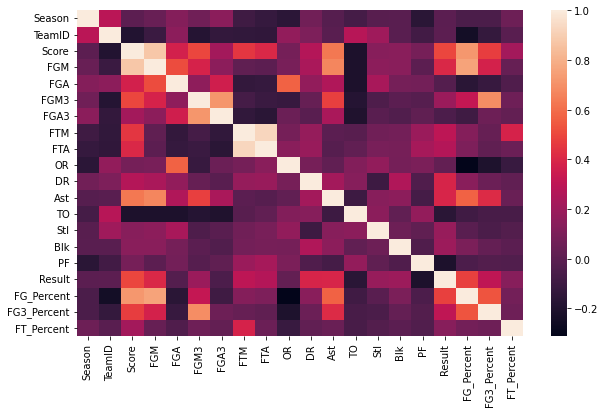

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())
plt.show()

# MODEL BUILDING

In [15]:
#Get Pandas Columns for prediction
target = df["Result"]
features = df.drop(["Result"], axis=1) # Because we don't want to compare Result to itself

#Convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Logistic Regression

In [16]:
#train our model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

C:\Users\gwoo3513\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#1 = Win
#0 = Loss
out_sample_preds

array([1, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [18]:
#1 = Win
#0 = Loss
y_test

array([1, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [19]:
# Using this function you can see what the probability is of the test subject being in class 0=Loss or 1=Win
# In this instance, you can see the first row is considered to be 87.9% likely to be a loss, therefore it is assigned 
# to be "loss".  
reg.predict_proba(X_test)

array([[0.00037338, 0.99962662],
       [0.21017774, 0.78982226],
       [0.96913937, 0.03086063],
       ...,
       [0.01247112, 0.98752888],
       [0.03021248, 0.96978752],
       [0.99260341, 0.00739659]])

In [20]:
#Classification Report is not a metric, it is a way to view many metrics at one time.

print(classification_report(y_test, out_sample_preds))
print()
print(confusion_matrix(y_test, out_sample_preds))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     35499
           1       0.88      0.87      0.88     35489

    accuracy                           0.88     70988
   macro avg       0.88      0.88      0.88     70988
weighted avg       0.88      0.88      0.88     70988


[[31209  4290]
 [ 4490 30999]]


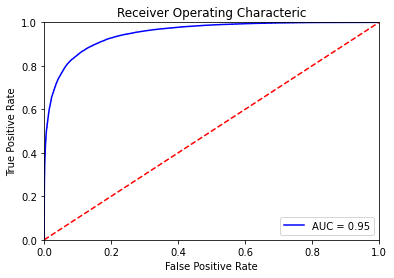

In [21]:
# Generate a ROC Curve (Receiver Operating Charactersitic Curve)
# A good ROC Curve has an AUC (Area Under the Curve) close to 1.  In the example below it is the area between 
# the dashed line and the blue line
# This is an illustration that measures how well our model fits the type 1 and 2 errors.
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title ('Receiver Operating Characteric')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Put it all together

C:\Users\gwoo3513\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.88      0.88      0.88    141969
           1       0.88      0.88      0.88    141979

    accuracy                           0.88    283948
   macro avg       0.88      0.88      0.88    283948
weighted avg       0.88      0.88      0.88    283948


Confusion Matrix - In Sample
[[124937  17032]
 [ 17700 124279]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     35499
           1       0.88      0.87      0.88     35489

    accuracy                           0.88     70988
   macro avg       0.88      0.88      0.88     70988
weighted avg       0.88      0.88      0.88     70988


Confusion Matrix - Out Sample
[[31209  4290]
 [ 4490 30999]]


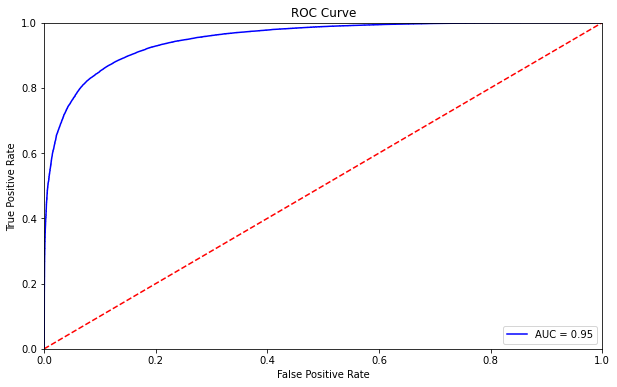

In [22]:
#train our model
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Model

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141969
           1       1.00      1.00      1.00    141979

    accuracy                           1.00    283948
   macro avg       1.00      1.00      1.00    283948
weighted avg       1.00      1.00      1.00    283948


Confusion Matrix - In Sample
[[141969      0]
 [     0 141979]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     35499
           1       0.78      0.78      0.78     35489

    accuracy                           0.78     70988
   macro avg       0.78      0.78      0.78     70988
weighted avg       0.78      0.78      0.78     70988


Confusion Matrix - Out Sample
[[27674  7825]
 [ 7894 27595]]


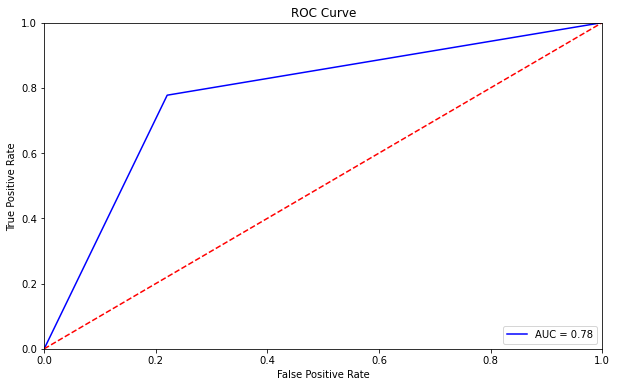

In [23]:
#train our model
dt = DecisionTreeClassifier(random_state=21)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141969
           1       1.00      1.00      1.00    141979

    accuracy                           1.00    283948
   macro avg       1.00      1.00      1.00    283948
weighted avg       1.00      1.00      1.00    283948


Confusion Matrix - In Sample
[[141969      0]
 [     1 141978]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     35499
           1       0.86      0.85      0.85     35489

    accuracy                           0.86     70988
   macro avg       0.86      0.86      0.86     70988
weighted avg       0.86      0.86      0.86     70988


Confusion Matrix - Out Sample
[[30694  4805]
 [ 5477 30012]]


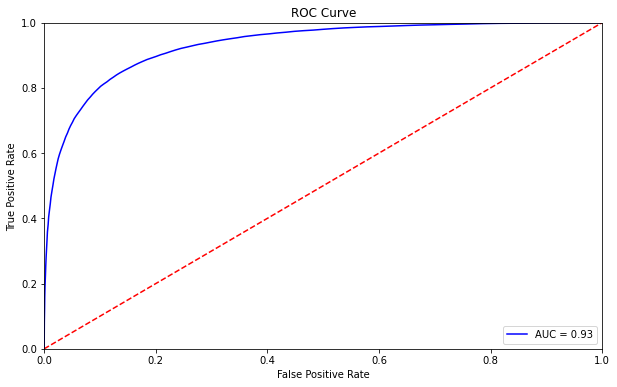

In [24]:
#train our model
rf = RandomForestClassifier(random_state=21)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# adaBoost Model

AdaBoost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.86      0.85      0.86    141969
           1       0.85      0.86      0.86    141979

    accuracy                           0.86    283948
   macro avg       0.86      0.86      0.86    283948
weighted avg       0.86      0.86      0.86    283948


Confusion Matrix - In Sample
[[121231  20738]
 [ 20036 121943]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     35499
           1       0.85      0.85      0.85     35489

    accuracy                           0.85     70988
   macro avg       0.85      0.85      0.85     70988
weighted avg       0.85      0.85      0.85     70988


Confusion Matrix - Out Sample
[[30340  5159]
 [ 5163 30326]]


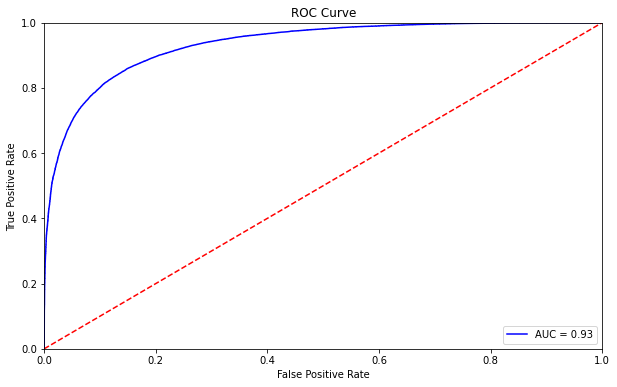

In [25]:
#train our model
ada = AdaBoostClassifier(random_state=21)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("AdaBoost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boost Model

Gradient Boosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.86      0.86      0.86    141969
           1       0.86      0.86      0.86    141979

    accuracy                           0.86    283948
   macro avg       0.86      0.86      0.86    283948
weighted avg       0.86      0.86      0.86    283948


Confusion Matrix - In Sample
[[122436  19533]
 [ 19982 121997]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     35499
           1       0.86      0.85      0.86     35489

    accuracy                           0.86     70988
   macro avg       0.86      0.86      0.86     70988
weighted avg       0.86      0.86      0.86     70988


Confusion Matrix - Out Sample
[[30666  4833]
 [ 5166 30323]]


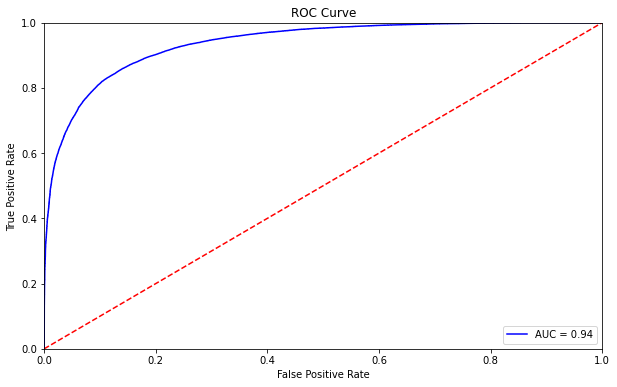

In [26]:
#train our model
gb = GradientBoostingClassifier(random_state=21)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("Gradient Boosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost Model

XTreme Gradient Boosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    141969
           1       0.90      0.89      0.89    141979

    accuracy                           0.89    283948
   macro avg       0.89      0.89      0.89    283948
weighted avg       0.89      0.89      0.89    283948


Confusion Matrix - In Sample
[[127486  14483]
 [ 15471 126508]]

--------------------------------------------------------------------

Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     35499
           1       0.88      0.87      0.88     35489

    accuracy                           0.88     70988
   macro avg       0.88      0.88      0.88     70988
weighted avg       0.88      0.88      0.88     70988


Confusion Matrix - Out Sample
[[31362  4137]
 [ 4501 30988]]


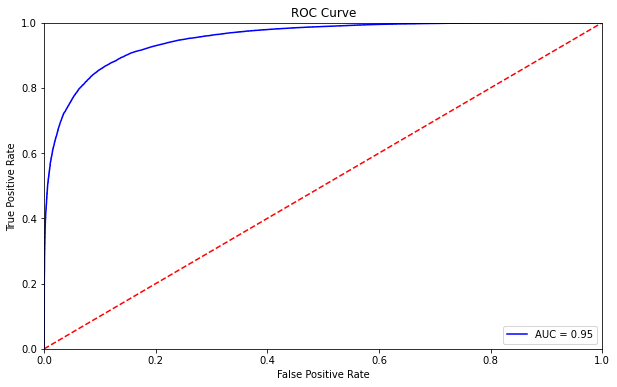

In [27]:
#train our model
xgb = XGBClassifier(random_state=21)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XTreme Gradient Boosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print('--------------------------------------------------------------------')
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Selection

## I choose to go with XGB

XTreme Gradient Boosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    177468
           1       0.90      0.89      0.89    177468

    accuracy                           0.89    354936
   macro avg       0.89      0.89      0.89    354936
weighted avg       0.89      0.89      0.89    354936


Confusion Matrix - In Sample
[[159036  18432]
 [ 19876 157592]]


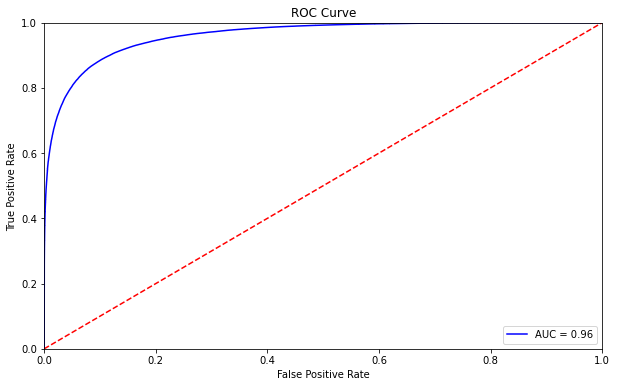

In [28]:
#train our model
xgb = XGBClassifier(random_state=21)
xgb.fit(X, y)

#get predictions
in_sample_preds = xgb.predict(X)

# get evaluation report
print("XTreme Gradient Boosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y, in_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X)[:,1]
fpr, tpr, threshold = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title ('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Save Our Model for Real World Applications

In [29]:
import pickle

In [30]:
filename = 'ncaa_xgb.sav'
pickle.dump(xgb, open(filename, 'wb'))

# Load the Model Back in to Use for predictions

In [31]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [32]:
probs = loaded_model.predict_proba(X)
probs = probs[:,1]
loss = brier_score_loss(y, probs)

In [33]:
loss

0.07799441471100634

In [34]:
Intentional AEROROROEROE

SyntaxError: invalid syntax (Temp/ipykernel_29020/181946681.py, line 1)

# Create Matchup for Test

In [35]:
season = 2017

team_a = 1101
team_b = 1104

team_a_stats = df.loc[(df.TeamID == team_a) & (df.Season == season)]
team_a_results = team_a_stats['Result']
team_a_stats = team_a_stats.drop(['Result'], axis=1)

team_b_stats = df.loc[(df.TeamID == team_b) & (df.Season == season)]
team_b_results = team_b_stats['Result']
team_b_stats = team_b_stats.drop(['Result'], axis=1)

probs_team_a = xgb.predict_proba(team_a_stats)
probs_team_a = probs_team_a[:,1]
loss_team_a = brier_score_loss(team_a_results, probs_team_a)

probs_team_b = xgb.predict_proba(team_b_stats)
probs_team_b = probs_team_b[:,1]
loss_team_b = brier_score_loss(team_b_results, probs_team_b)

#Not a fan of my idea - but it was the only one I could come up with so far - I chose to take the average of the team's probability of a win through it's entire season
#Whichever team had the higher probability of a win would be the winner (Not a fan because the team could have had an easier schedule) - maybe i can figure out how to multiply by strength of schedule factor?
# print(probs_team_a.mean())
# print(probs_team_b.mean())

team_a_win_prob = probs_team_a.mean()/(probs_team_a.mean()+probs_team_b.mean())
team_b_win_prob = probs_team_b.mean()/(probs_team_a.mean()+probs_team_b.mean())

print(team_a_win_prob)
print(team_b_win_prob)

0.40206987
0.5979302


In [36]:
outcome = []

def get_matchup(team_a_input, team_b_input, season_input):
    team_a = team_a_input
    team_b = team_b_input
    season = season_input

    team_a_stats = df.loc[(df.TeamID == team_a) & (df.Season == season)]
    team_a_results = team_a_stats['Result']
    team_a_stats = team_a_stats.drop(['Result'], axis=1)

    team_b_stats = df.loc[(df.TeamID == team_b) & (df.Season == season)]
    team_b_results = team_b_stats['Result']
    team_b_stats = team_b_stats.drop(['Result'], axis=1)

    probs_team_a = xgb.predict_proba(team_a_stats)
    probs_team_a = probs_team_a[:,1]
    loss_team_a = brier_score_loss(team_a_results, probs_team_a)

    probs_team_b = xgb.predict_proba(team_b_stats)
    probs_team_b = probs_team_b[:,1]
    loss_team_b = brier_score_loss(team_b_results, probs_team_b)
    
    team_a_win_prob = probs_team_a.mean()/(probs_team_a.mean()+probs_team_b.mean())
    team_b_win_prob = probs_team_b.mean()/(probs_team_a.mean()+probs_team_b.mean())

    outcome.append(team_a_win_prob)

In [ ]:
get_matchup(1101, 1104, 2017)

In [37]:
outcome

[]

In [38]:
# Read in sample submission set

SampleSubmissionWarmup_df = pd.read_csv("SampleSubmissionWarmup.csv")
SampleSubmissionWarmup_df

,ID,Pred
0,2017_1101_1102,0.5
1,2017_1101_1103,0.5
2,2017_1101_1104,0.5
3,2017_1101_1105,0.5
4,2017_1101_1106,0.5
...,...,...
614314,2022_3469_3471,0.5
614315,2022_3469_3472,0.5
614316,2022_3470_3471,0.5
614317,2022_3470_3472,0.5


In [39]:
# Expand the ID column into Season and Team columns
SampleSubmissionWarmup_df[['Season', 'ATeam', 'BTeam']] = SampleSubmissionWarmup_df['ID'].str.split('_', expand=True).astype(int)
SampleSubmissionWarmup_df.head()

,ID,Pred,Season,ATeam,BTeam
0,2017_1101_1102,0.5,2017,1101,1102
1,2017_1101_1103,0.5,2017,1101,1103
2,2017_1101_1104,0.5,2017,1101,1104
3,2017_1101_1105,0.5,2017,1101,1105
4,2017_1101_1106,0.5,2017,1101,1106


In [42]:
SampleSubmissionWarmup_df.iloc[427942]

ID        2021_3101_3169
Pred                 0.5
Season              2021
ATeam               3101
BTeam               3169
Name: 427942, dtype: object

In [ ]:
outcome = []
outcome

In [40]:
Season = []
ATeam = []
BTeam = []


for index, row in SampleSubmissionWarmup_df.iterrows():
    Season = SampleSubmissionWarmup_df.Season
    ATeam = SampleSubmissionWarmup_df.ATeam
    BTeam = SampleSubmissionWarmup_df.BTeam
    get_matchup(row['ATeam'],row['BTeam'],row['Season'])

IndexError: index 1 is out of bounds for axis 1 with size 0

In [41]:
len(outcome)

427942

In [44]:
outcome

[0.42965195,
 0.3510646,
 0.40206987,
 0.6946646,
 0.63923836,
 0.37158188,
 0.4114866,
 0.5355497,
 0.5783773,
 0.31289354,
 0.46378565,
 0.48249793,
 0.7007271,
 0.34862134,
 0.39564195,
 0.46097836,
 0.4219306,
 0.5065523,
 0.38467196,
 0.34628156,
 0.3574166,
 0.52132535,
 0.5245031,
 0.40195736,
 0.5032675,
 0.4043932,
 0.484724,
 0.4854776,
 0.48266575,
 0.466584,
 0.3477766,
 0.4163713,
 0.35847163,
 0.3442448,
 0.43996438,
 0.6189705,
 0.39523724,
 0.4354065,
 0.4779192,
 0.48503977,
 0.58995664,
 0.5234802,
 0.45615563,
 0.4128452,
 0.73700124,
 0.3277843,
 0.5350628,
 0.3734046,
 0.6156209,
 0.45743856,
 0.36066172,
 0.5641947,
 0.38133332,
 0.3627973,
 0.46898416,
 0.43664154,
 0.55945504,
 0.50818104,
 0.3658021,
 0.3977398,
 0.4685368,
 0.44477913,
 0.4473622,
 0.53844744,
 0.42187482,
 0.33448324,
 0.46984035,
 0.62398905,
 0.397585,
 0.5752706,
 0.61357766,
 0.5590152,
 0.5320893,
 0.33322784,
 0.4933366,
 0.50713027,
 0.51657933,
 0.44634175,
 0.37628165,
 0.42371038,
 

In [45]:
np.array(outcome)

array([0.42965195, 0.3510646 , 0.40206987, ..., 0.51421195, 0.538693  ,
       0.67039025], dtype=float32)

In [46]:
outcome

[0.42965195,
 0.3510646,
 0.40206987,
 0.6946646,
 0.63923836,
 0.37158188,
 0.4114866,
 0.5355497,
 0.5783773,
 0.31289354,
 0.46378565,
 0.48249793,
 0.7007271,
 0.34862134,
 0.39564195,
 0.46097836,
 0.4219306,
 0.5065523,
 0.38467196,
 0.34628156,
 0.3574166,
 0.52132535,
 0.5245031,
 0.40195736,
 0.5032675,
 0.4043932,
 0.484724,
 0.4854776,
 0.48266575,
 0.466584,
 0.3477766,
 0.4163713,
 0.35847163,
 0.3442448,
 0.43996438,
 0.6189705,
 0.39523724,
 0.4354065,
 0.4779192,
 0.48503977,
 0.58995664,
 0.5234802,
 0.45615563,
 0.4128452,
 0.73700124,
 0.3277843,
 0.5350628,
 0.3734046,
 0.6156209,
 0.45743856,
 0.36066172,
 0.5641947,
 0.38133332,
 0.3627973,
 0.46898416,
 0.43664154,
 0.55945504,
 0.50818104,
 0.3658021,
 0.3977398,
 0.4685368,
 0.44477913,
 0.4473622,
 0.53844744,
 0.42187482,
 0.33448324,
 0.46984035,
 0.62398905,
 0.397585,
 0.5752706,
 0.61357766,
 0.5590152,
 0.5320893,
 0.33322784,
 0.4933366,
 0.50713027,
 0.51657933,
 0.44634175,
 0.37628165,
 0.42371038,
 

In [ ]:
SampleSubmissionWarmup_df

In [ ]:
print(Outcome)

In [ ]:
SampleSubmissionWarmup_df[['Outcome']] = outcome

In [ ]:
SampleSubmissionWarmup_df

In [ ]:
#Change Result to integer

df_dum = pd.get_dummies(df[["Result"]], drop_first=True)
df_dum.columns = ["Result"]
#put back into original dataset (sometimes you have to do a join here)
df["Result"] = df_dum["Result"]

In [ ]:
#add columns
df['ID'] = df['Season'].astype(str)+'_'+df['TeamID'].astype(str)
df